# Local Explanations with [Lime](https://github.com/marcotcr/lime.git) 
### In our [work](https://arxiv.org/abs/2406.08351) on Interpretable Machine Learning, we considered two cases to perturb around: <br /> i) One  ΛCDM $f\sigma_8$ realization <br /> ii) One Hu-Sawicki $f\sigma_8$ sample.
(Check their [paper](https://arxiv.org/abs/1602.04938))

In [806]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import ast
import re

### Read the data created using Lime (Hu-Sawicki instance)

In [ ]:
def parse_string_to_array(s):
    return np.fromstring(s.strip('[]'), sep=' ')

def extract_numbers(s):
    return [float(num) for num in re.findall(r'-?\d+\.\d+', s)]

#Read the instance loop
df = pd.read_csv('./data/Instance1_HS_LimeExplanations.csv')
O_prob = np.array(df.iloc[0].values) #OVERALL PROBS
O_prob = np.array([parse_string_to_array(arr) for arr in O_prob]) #Array with the 2 probs, 10 points
Prob_LCDM = O_prob[:, 0] #Array with LCDM probability
Prob_HS = O_prob[:, 1] #Array with HS probability
L_prob = np.array(df.iloc[1].values) #LOCAL PROBS

In [807]:
ordered_features=[]

for i in range(len(L_prob)):
    input_string = L_prob[i]
    pattern = r"fs8_\d+"
    matches = re.findall(pattern, input_string)
    processed_matches = [float(x) if re.match(r"[-+]?\d*\.\d+|\d+", x) else x for x in matches]
    filtered_matches = []
    i = 0
    while i < len(processed_matches):
        if isinstance(processed_matches[i], str) and 'fs8_' in processed_matches[i]:
            filtered_matches.append(processed_matches[i])
            if i + 1 < len(processed_matches) and isinstance(processed_matches[i + 1], float):
                filtered_matches.append(processed_matches[i + 1])
        i += 1

    ordered_features.append(filtered_matches)

In [808]:
local_probabilities = []
for i in range(len(L_prob)):
    input_string = L_prob[i]
    pattern = r",\s*(-?\d+\.\d+)" 
    matches = re.findall(pattern, input_string)
    numerical_values = [float(value) for value in matches]
    local_probabilities.append(numerical_values)

In [809]:
#Match the feature names with local probabilities
list0 = [[ordered_features[0][i], local_probabilities[0][i]] for i in range(len(local_probabilities[0]))]
list1 = [[ordered_features[1][i], local_probabilities[1][i]] for i in range(len(local_probabilities[1]))]
list2 = [[ordered_features[2][i], local_probabilities[2][i]] for i in range(len(local_probabilities[2]))]
list3 = [[ordered_features[3][i], local_probabilities[3][i]] for i in range(len(local_probabilities[3]))]
list4 = [[ordered_features[4][i], local_probabilities[4][i]] for i in range(len(local_probabilities[4]))]
list5 = [[ordered_features[5][i], local_probabilities[5][i]] for i in range(len(local_probabilities[5]))]
list6 = [[ordered_features[6][i], local_probabilities[6][i]] for i in range(len(local_probabilities[6]))]
list7 = [[ordered_features[7][i], local_probabilities[7][i]] for i in range(len(local_probabilities[7]))]
list8 = [[ordered_features[8][i], local_probabilities[8][i]] for i in range(len(local_probabilities[8]))]
list9 = [[ordered_features[9][i], local_probabilities[9][i]] for i in range(len(local_probabilities[9]))]
#Sort the lists wrt to the feature
list0 = sorted(list0, key=lambda x: int(x[0].split('_')[1]))
list1 = sorted(list1, key=lambda x: int(x[0].split('_')[1]))
list2 = sorted(list2, key=lambda x: int(x[0].split('_')[1]))
list3 = sorted(list3, key=lambda x: int(x[0].split('_')[1]))
list4 = sorted(list4, key=lambda x: int(x[0].split('_')[1]))
list5 = sorted(list5, key=lambda x: int(x[0].split('_')[1]))
list6 = sorted(list6, key=lambda x: int(x[0].split('_')[1]))
list7 = sorted(list7, key=lambda x: int(x[0].split('_')[1]))
list8 = sorted(list8, key=lambda x: int(x[0].split('_')[1]))
list9 = sorted(list9, key=lambda x: int(x[0].split('_')[1]))

In [810]:
#Sepparate in features, to get the statistics
fs8_s_f = [[list0[i][1],list1[i][1],list2[i][1],list3[i][1],list4[i][1],list5[i][1],list6[i][1],list7[i][1],list8[i][1],list9[i][1]] for i in range(len(list0))]
#st_devs and means
means = [np.mean(fs8_s_f[i]) for i in range(len(fs8_s_f))]
st_devs = [np.std(fs8_s_f[i]) for i in range(len(fs8_s_f))]
mean_std = [[means[i], st_devs[i], i+1] for i in range(len(means))]
sorted_mean_std = sorted(mean_std, key=lambda x: abs(x[0]),  reverse=False)

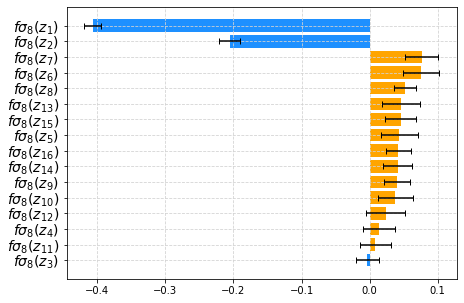

In [811]:
#Extract the data and errors
labels = ['$f\\sigma_8(z_{' + str(sorted_mean_std[i][2]) + '})$' for i in range(len(sorted_mean_std))][::-1]
values = [sorted_mean_std[i][0] for i in range(len(sorted_mean_std))]
errors = [sorted_mean_std[i][1] for i in range(len(sorted_mean_std))]

fig = plt.figure(figsize=(7, 5))
y_pos = np.arange(len(labels))

#Bars plot with error bars
bars = plt.barh(y_pos, values, xerr=errors, align='center', color=['orange' if v >= 0 else 'dodgerblue' for v in values], capsize=3)
plt.yticks(y_pos, labels[::-1], fontsize=14)
plt.grid(color='lightgray', linestyle='--')
plt.show()

#### Full plot with True class and overall predicted probability

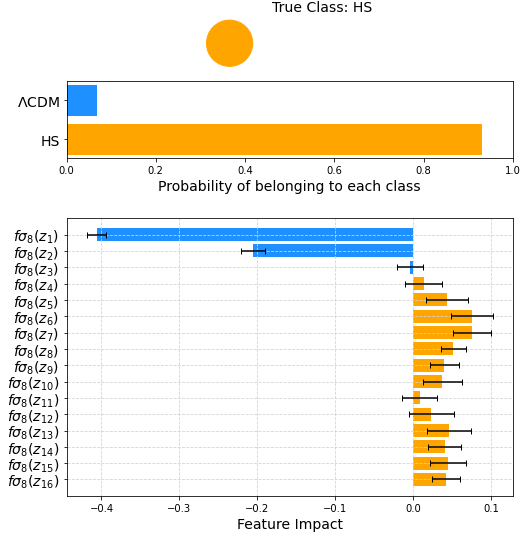

<Figure size 72x72 with 0 Axes>

In [813]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(8, 9))
gs = gridspec.GridSpec(3, 1, height_ratios=[0.3, 0.5, 2])

#First subplot: True class
ax1 = fig.add_subplot(gs[0])

y = np.arange(2)
Probs = [Prob_HS[0], Prob_LCDM[0]]
cir = plt.figure(figsize=(1, 1))
if Probs[0] >= 0.5:
    set_color = 'orange'
    class_type = 'HS'
else: #Probs[0] <= 0:
    set_color = 'dodgerblue'
    class_type = '$\Lambda$CDM'
    
ax1.axis('off')
circle = plt.Circle((-0.8, 0.2), 0.5, color=set_color, transform=ax1.transAxes, clip_on=False)
ax1.add_artist(circle)
ax1.set_aspect('equal', 'box')
ax1.text(0.8, 6.8, 'True Class: ' + class_type, horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, fontsize=14, color='black')

#Second subplot: Overall probability
ax2 = fig.add_subplot(gs[1])
ax2.barh(y, Probs, xerr=np.std(Prob_HS), color=['orange', 'dodgerblue'])
ax2.set_yticks(y)
ax2.set_xlabel('Probability of belonging to each class', fontsize=14)
ax2.set_yticklabels(['HS', '$\Lambda$CDM'], fontsize=14)
ax2.set_xlim(0, 1)

#Extract the data and errors
labels = ['$f\\sigma_8(z_{' + str(mean_std[i][2]) + '})$' for i in range(len(sorted_mean_std))]
values = [mean_std[i][0] for i in range(len(sorted_mean_std))][::-1]
errors = [mean_std[i][1] for i in range(len(sorted_mean_std))][::-1]

y_pos = np.arange(len(labels))

#Third subplot: bar plot with error bars
ax3 = fig.add_subplot(gs[2])
ax3.barh(y_pos, values, xerr=errors, align='center', color=['orange' if v >= 0 else 'dodgerblue' for v in values], capsize=3)
ax3.set_yticks(y_pos)
ax3.set_yticklabels(labels[::-1], fontsize=14)
ax3.set_ylim(-1,16)
ax3.grid(color='lightgray', linestyle='--')
ax3.set_xlabel('Feature Impact', fontsize=14)
plt.subplots_adjust(hspace=10)

pos3 = ax3.get_position()
ax3.set_position([pos3.x0, pos3.y0 - 0.0005, pos3.width, pos3.height * 0.9])
fig.savefig('./Combined_Label_HS_Local_prob.pdf')
plt.show()

### Read the data created using Lime (ΛCDM instance)

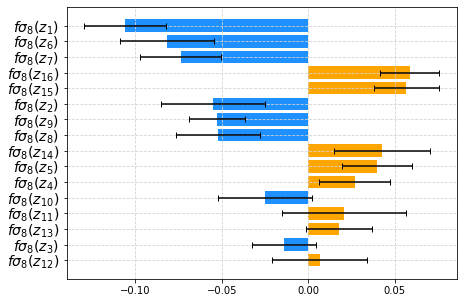

In [814]:
#Read the instance loop
df = pd.read_csv('./data/Instance6_LCDM_LimeExplanations.csv')
L_prob = np.array(df.iloc[1].values) #LOCAL PROBS

ordered_features=[]

for i in range(len(L_prob)):
    input_string = L_prob[i]
    pattern = r"fs8_\d+"
    matches = re.findall(pattern, input_string)
    processed_matches = [float(x) if re.match(r"[-+]?\d*\.\d+|\d+", x) else x for x in matches]
    filtered_matches = []
    i = 0
    while i < len(processed_matches):
        if isinstance(processed_matches[i], str) and 'fs8_' in processed_matches[i]:
            filtered_matches.append(processed_matches[i])
            if i + 1 < len(processed_matches) and isinstance(processed_matches[i + 1], float):
                filtered_matches.append(processed_matches[i + 1])
        i += 1

    ordered_features.append(filtered_matches)

local_probabilities = []
for i in range(len(L_prob)):
    input_string = L_prob[i]
    pattern = r",\s*(-?\d+\.\d+)" 
    matches = re.findall(pattern, input_string)
    numerical_values = [float(value) for value in matches]
    local_probabilities.append(numerical_values)

#Match the feature names with local probabilities
list0 = [[ordered_features[0][i], local_probabilities[0][i]] for i in range(len(local_probabilities[0]))]
list1 = [[ordered_features[1][i], local_probabilities[1][i]] for i in range(len(local_probabilities[1]))]
list2 = [[ordered_features[2][i], local_probabilities[2][i]] for i in range(len(local_probabilities[2]))]
list3 = [[ordered_features[3][i], local_probabilities[3][i]] for i in range(len(local_probabilities[3]))]
list4 = [[ordered_features[4][i], local_probabilities[4][i]] for i in range(len(local_probabilities[4]))]
list5 = [[ordered_features[5][i], local_probabilities[5][i]] for i in range(len(local_probabilities[5]))]
list6 = [[ordered_features[6][i], local_probabilities[6][i]] for i in range(len(local_probabilities[6]))]
list7 = [[ordered_features[7][i], local_probabilities[7][i]] for i in range(len(local_probabilities[7]))]
list8 = [[ordered_features[8][i], local_probabilities[8][i]] for i in range(len(local_probabilities[8]))]
list9 = [[ordered_features[9][i], local_probabilities[9][i]] for i in range(len(local_probabilities[9]))]

#Sort the lists wrt to the feature
list0 = sorted(list0, key=lambda x: int(x[0].split('_')[1]))
list1 = sorted(list1, key=lambda x: int(x[0].split('_')[1]))
list2 = sorted(list2, key=lambda x: int(x[0].split('_')[1]))
list3 = sorted(list3, key=lambda x: int(x[0].split('_')[1]))
list4 = sorted(list4, key=lambda x: int(x[0].split('_')[1]))
list5 = sorted(list5, key=lambda x: int(x[0].split('_')[1]))
list6 = sorted(list6, key=lambda x: int(x[0].split('_')[1]))
list7 = sorted(list7, key=lambda x: int(x[0].split('_')[1]))
list8 = sorted(list8, key=lambda x: int(x[0].split('_')[1]))
list9 = sorted(list9, key=lambda x: int(x[0].split('_')[1]))

#Sepparate in features, to get the statistics
fs8_s_f = [[list0[i][1],list1[i][1],list2[i][1],list3[i][1],list4[i][1],list5[i][1],list6[i][1],list7[i][1],list8[i][1],list9[i][1]] for i in range(len(list0))]

#st_devs and means
means = [np.mean(fs8_s_f[i]) for i in range(len(fs8_s_f))]
st_devs = [np.std(fs8_s_f[i]) for i in range(len(fs8_s_f))]
mean_std = [[means[i], st_devs[i], i+1] for i in range(len(means))]
sorted_mean_std = sorted(mean_std, key=lambda x: abs(x[0]),  reverse=False)

#Extract the data and errors
labels = ['$f\\sigma_8(z_{' + str(sorted_mean_std[i][2]) + '})$' for i in range(len(sorted_mean_std))][::-1]
values = [sorted_mean_std[i][0] for i in range(len(sorted_mean_std))]
errors = [sorted_mean_std[i][1] for i in range(len(sorted_mean_std))]

fig = plt.figure(figsize=(7, 5))
y_pos = np.arange(len(labels))

#Create the bar plot with error bars
bars = plt.barh(y_pos, values, xerr=errors, align='center', color=['orange' if v >= 0 else 'dodgerblue' for v in values], capsize=3)
plt.yticks(y_pos, labels[::-1], fontsize=14)
plt.grid(color='lightgray', linestyle='--')

plt.show()

#### Full plot with True class and overall predicted probability (Hu-Sawicki)

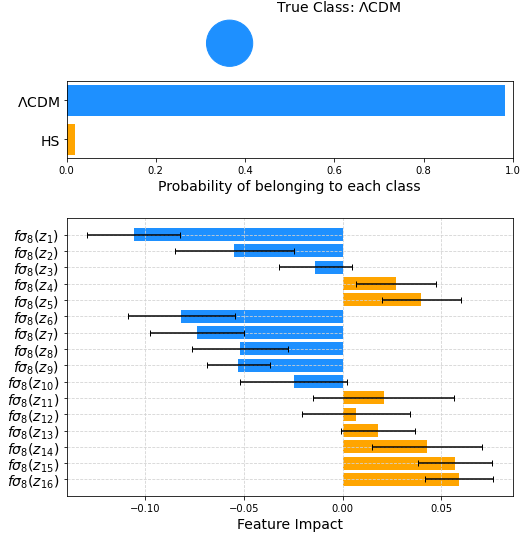

<Figure size 72x72 with 0 Axes>

In [816]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(8, 9))
gs = gridspec.GridSpec(3, 1, height_ratios=[0.3, 0.5, 2])

#First subplot: True Class
ax1 = fig.add_subplot(gs[0])

#ax1 = plt.figure(figsize=(6,1))
y = np.arange(2)
Probs = [Prob_HS[0], Prob_LCDM[0]]
cir = plt.figure(figsize=(1, 1))
if Probs[0] >= 0.5:
    set_color = 'orange'
    class_type = 'HS'
else: #Probs[0] <= 0:
    set_color = 'dodgerblue'
    class_type = '$\Lambda$CDM'
    
ax1.axis('off')
circle = plt.Circle((-0.8, 0.2), 0.5, color=set_color, transform=ax1.transAxes, clip_on=False)
ax1.add_artist(circle)
ax1.set_aspect('equal', 'box')
ax1.text(0.85, 6.8, 'True Class: ' + class_type, horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, fontsize=14, color='black')

#Second subplot: Overall probability
ax2 = fig.add_subplot(gs[1])
ax2.barh(y, Probs, xerr=np.std(Prob_HS), color=['orange', 'dodgerblue'])
ax2.set_yticks(y)
ax2.set_xlabel('Probability of belonging to each class', fontsize=14)
ax2.set_yticklabels(['HS', '$\Lambda$CDM'], fontsize=14)
ax2.set_xlim(0, 1)

#Extract the data and errors
labels = ['$f\\sigma_8(z_{' + str(mean_std[i][2]) + '})$' for i in range(len(sorted_mean_std))]
values = [mean_std[i][0] for i in range(len(sorted_mean_std))][::-1]
errors = [mean_std[i][1] for i in range(len(sorted_mean_std))][::-1]

#fig = plt.figure(figsize=(8, 5))
y_pos = np.arange(len(labels))

#Third subplot: bar plot with error bars
ax3 = fig.add_subplot(gs[2])
ax3.barh(y_pos, values, xerr=errors, align='center', color=['orange' if v >= 0 else 'dodgerblue' for v in values], capsize=3)
ax3.set_yticks(y_pos)
ax3.set_yticklabels(labels[::-1], fontsize=14)
ax3.set_ylim(-1,16)
ax3.grid(color='lightgray', linestyle='--')
ax3.set_xlabel('Feature Impact', fontsize=14)
plt.subplots_adjust(hspace=10)

pos3 = ax3.get_position()
ax3.set_position([pos3.x0, pos3.y0 - 0.0005, pos3.width, pos3.height * 0.9])
fig.savefig('./Combined_Label_LCDM_Local_prob.pdf')
plt.show()